In [85]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

# Helpers

In [86]:
def bold(string):
    return f'\033[1m{string}\033[0m'

def green_bold(string):
    return f'\033[1;32m{string}\033[0m'

def blue_bold(string):
    return f'\033[1;34m{string}\033[0m'

def red_bold(string):
    return f'\033[1;31m{string}\033[0m'

def custom_value_counts(series):
    return (series.value_counts(normalize=True)
            .mul(100).round(2)
            .sort_values(ascending=False)
            .astype(str).add('%')
            .rename('Percentage')
            .head(20)).to_frame().T

In [87]:
df_orig = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094', sep=',')
df_orig.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [88]:
df = df_orig.copy(deep=True)

Descriptive Statistics

In [89]:
df.shape # Shape of dataframe

(550068, 10)

In [90]:
df.info() # Dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [91]:
# Unique values in User_ID is not same as shape of df. So we can't drop them
print(f'The count of User_ID: {green_bold(df["User_ID"].nunique())}')

The count of User_ID: 5891


# Descriptive Statistics

## Categorial columns

In [92]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


Product ID, Gender, Age, City_Category are all Categorical variables. We can check if Stay_In_Current_City_Years is also categorical

In [93]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

We can check top 10 unique values for all object columns

In [94]:
for column in df.select_dtypes(include='object').columns:
    print(f"The Column {green_bold(column)} has {green_bold(df[column].nunique())} unique values {bold(df[column].unique()[:10])}")

The Column Product_ID has 3631 unique values ['P00069042' 'P00248942' 'P00087842' 'P00085442' 'P00285442' 'P00193542'
 'P00184942' 'P00346142' 'P0097242' 'P00274942']
The Column Gender has 2 unique values ['F' 'M']
The Column Age has 7 unique values ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
The Column City_Category has 3 unique values ['A' 'C' 'B']
The Column Stay_In_Current_City_Years has 5 unique values ['2' '4+' '3' '1' '0']


We have 3631 unique products, 2 genders, 7 age groups and 4 city categories. We can convert them to categorial format

In [95]:
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').apply(lambda x: x.astype('category'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(5)
memory usage: 24.3 MB


All object columns are converted to categories. We could see than the memory reduced drastically from 42 to 24 MB

In [96]:
for column in df.select_dtypes(include='category').columns:
    print('\n'+'#'*100+'\n')
    print(f"The Column {green_bold(column)}' has '{green_bold(df[column].nunique())}' unique values\n\n")
    display(custom_value_counts(df[column]))

print('\n'+'#'*100+'\n')


####################################################################################################

The Column Product_ID' has '3631' unique values




Product_ID,P00265242,P00110742,P00025442,P00112142,P00057642,P00058042,P00059442,P00145042,P00046742,P00184942,P00237542,P00255842,P00117942,P00110942,P00010742,P00117442,P00051442,P00102642,P00110842,P00220442
Percentage,0.34%,0.29%,0.29%,0.28%,0.27%,0.26%,0.26%,0.26%,0.26%,0.26%,0.25%,0.25%,0.25%,0.25%,0.25%,0.23%,0.23%,0.23%,0.23%,0.23%



####################################################################################################

The Column Gender' has '2' unique values




Gender,M,F
Percentage,75.31%,24.69%



####################################################################################################

The Column Age' has '7' unique values




Age,26-35,36-45,18-25,46-50,51-55,55+,0-17
Percentage,39.92%,20.0%,18.12%,8.31%,7.0%,3.91%,2.75%



####################################################################################################

The Column City_Category' has '3' unique values




City_Category,B,C,A
Percentage,42.03%,31.12%,26.85%



####################################################################################################

The Column Stay_In_Current_City_Years' has '5' unique values




Stay_In_Current_City_Years,1,2,3,4+,0
Percentage,35.24%,18.51%,17.32%,15.4%,13.53%



####################################################################################################



### Insights from the Categorical Data Analysis  

#### 1. Product Popularity (Product_ID)  
- There are **3,631 unique products**, indicating a **large variety** in the dataset.  
- The most popular product (`P00265242`) accounts for **only 0.34%** of total purchases,  
  suggesting that **no single product dominates sales** significantly.  
- The top 10 products combined **contribute less than 3%**, implying **a highly diverse product preference**  
  among customers.  

---

#### 2. Gender Distribution  
- **75.31%** of customers are **male**, while only **24.69%** are female.  
- This suggests that **men are the primary shoppers** in this dataset.  

---

#### 3. Age Distribution  
- The largest group of customers is **26-35 years old (39.92%)**, followed by **36-45 years old (20.0%)**.  
- Young adults (**18-35 years old**) **dominate purchases** (**~58%**), making them the **primary target audience**  
  for marketing efforts.  
- The **55+ group (3.91%) and 0-17 group (2.75%)** have **very low participation**

---

#### 4. City Category Distribution  
- Most customers are from **Tier-2 and Tier-3 cities**:  
  - **42.03%** from **City B**  
  - **31.12%** from **City C**  
  - **Only 26.85%** from **City A
- This suggests that **e-commerce adoption is strong in smaller cities**, making them an important market for expansion.  

---

#### 5. Duration of Stay in Current City  
- The largest group (**35.24%**) has stayed **1 year** in their current city.  
- More than **50%** of customers have stayed **≤2 years**, indicating a **highly mobile customer base**.  
- Customers staying **4+ years (15.4%)** are fewer  

---

### Key Business Insights  
1. **Diverse product demand:**  
   - With **3,631 unique products** and no single product dominating sales,  
     marketing efforts should focus on **personalized recommendations** rather than mass-market bestsellers.  

2. **Male-dominated shopping:**  
   - Since **~75%** of buyers are male, targeting female customers with **specialized campaigns** could unlock new revenue potential.  

3. **Young adults (18-35 years) are key buyers:**  
   - Brands should focus on **mobile-friendly experiences**, discounts, and loyalty programs that appeal to this tech-savvy group.  

4. **Tier-2 & Tier-3 cities are growing markets:**  
   - With **73% of shoppers from City B & C**, expanding **logistics, delivery options, and localized marketing** can drive more sales.  

5. **High customer mobility:**  
   - Since **more than half of customers have stayed ≤2 years in their current city**,  
     **customer retention strategies** (such as app notifications, flexible delivery, and loyalty rewards) are crucial.  

---


# Numerical columns

In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [98]:
for column in df.select_dtypes(include='number').columns:
    print('\n'+'#'*100+'\n')
    print(f"The Column {green_bold(column)}' has '{green_bold(df[column].nunique())}' unique values\n\n")
    display(custom_value_counts(df[column]))

print('\n'+'#'*100+'\n')


####################################################################################################

The Column User_ID' has '5891' unique values




User_ID,1001680,1004277,1001941,1001181,1000889,1003618,1001150,1004344,1004510,1000424,1003841,1003391,1002909,1002063,1001449,1005831,1005795,1001015,1004227,1004508
Percentage,0.19%,0.18%,0.16%,0.16%,0.15%,0.14%,0.14%,0.13%,0.13%,0.13%,0.13%,0.13%,0.13%,0.13%,0.13%,0.13%,0.13%,0.13%,0.12%,0.12%



####################################################################################################

The Column Occupation' has '21' unique values




Occupation,4,0,7,1,17,20,12,14,2,16,6,3,10,5,15,11,19,13,18,9
Percentage,13.15%,12.66%,10.75%,8.62%,7.28%,6.1%,5.67%,4.96%,4.83%,4.61%,3.7%,3.21%,2.35%,2.21%,2.21%,2.11%,1.54%,1.4%,1.2%,1.14%



####################################################################################################

The Column Marital_Status' has '2' unique values




Marital_Status,0,1
Percentage,59.03%,40.97%



####################################################################################################

The Column Product_Category' has '20' unique values




Product_Category,5,1,8,11,2,6,3,4,16,15,13,10,12,7,18,20,19,14,17,9
Percentage,27.44%,25.52%,20.71%,4.42%,4.34%,3.72%,3.67%,2.14%,1.79%,1.14%,1.01%,0.93%,0.72%,0.68%,0.57%,0.46%,0.29%,0.28%,0.11%,0.07%



####################################################################################################

The Column Purchase' has '18105' unique values




Purchase,7011,8038,7919,8110,8124,7784,6988,7976,8046,6937,7907,6943,7762,6875,7065,7999,6971,7813,7989,7941
Percentage,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%,0.03%



####################################################################################################



### Insights from the Numerical Data Analysis  

#### 1 Occupation  
- **Most common occupation:** **Category 4 (13.15%)**  
- **Least common occupation:** **Category 9 (1.14%)**  
- The top **4 categories (4, 0, 7, 1)** account for **45.18%** of the total, indicating a few dominant occupations.  
- The distribution is **somewhat skewed**, with a few occupations having significantly higher representation than others.  

---

#### 2 Marital Status
- **59.03%** of customers are **unmarried**, while **40.97%** are married.  
- This suggests that **unmarried individuals are the primary shoppers** in this dataset.  

---

#### 3 Product Category
- **Top 3 categories (5, 1, 8) account for 73.67%** of purchases, indicating strong demand in these areas.  
- **The bottom 10 categories together make up <5%**, suggesting **low sales in niche product segments**.  
- **Category 5 dominates (27.44%)**, meaning it could be a bestseller or a heavily promoted category.  

---

#### 4 Purchase
- **Extremely high diversity** in purchase amounts—each unique value makes up only **~0.03%** of total purchases.  
- This suggests **a nearly continuous spread of purchase amounts** rather than discrete price tiers.  
- **No clear price clusters**, meaning customers buy a **wide range of products at different price points**.  

---

### Key Business Insights  

1 **Occupation-Based Marketing:**  
   - Since a **few occupations dominate (45% of total customers)**, **targeted campaigns** can be designed for these professions.  
   - Analyzing the **spending habits of specific job categories** can improve product recommendations.  

2 **Marital Status & Segmentation:**  
   - **Family-oriented promotions** could be more effective for the **married group (41%)**.

3 **Product Category Optimization:**  
   - The **top 3 product categories contribute 73.67% of sales**, meaning inventory & marketing efforts should focus on these.  
   - The **lowest-performing product categories** need **bundling, discounts, or repositioning** to drive sales.  

4 **Diverse Purchase Patterns & Pricing Strategy:**  
   - **Loyalty programs** for **high-spending customers** can enhance retention.  

---


# Null and Outliers

In [99]:
df.isnull().sum().rename('Count') # No null values Need to handle them

,Count
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


# Duplicate record check

In [100]:
df[df.duplicated()].count() # No duplicate records

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


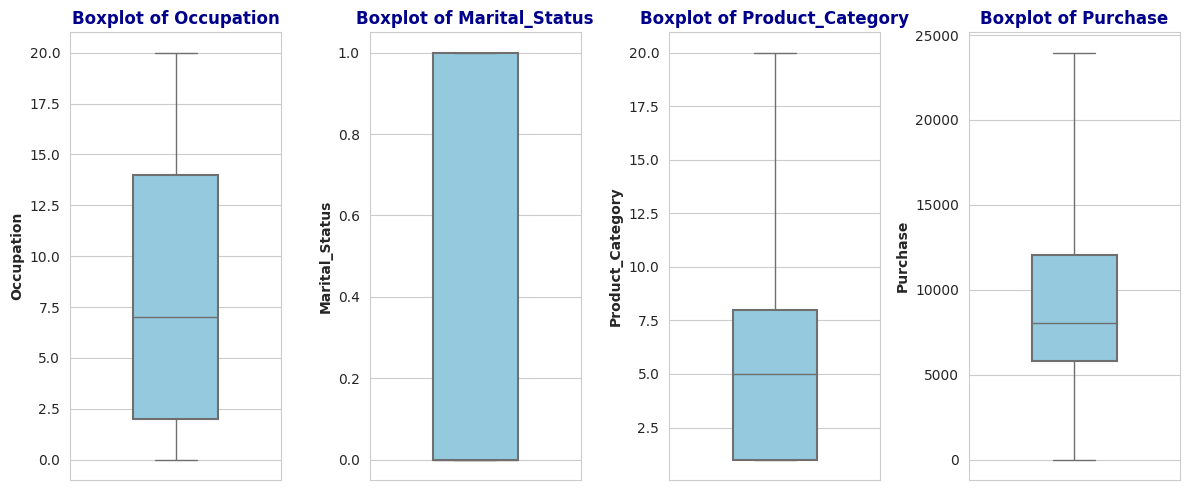

In [101]:
sns.set_style("whitegrid")

columns_to_plot = [col for col in df.select_dtypes(include='number').columns if col != 'User_ID'] # removing USER_ID for boxplot

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(12, 5))

# If one col, convert to iteratable
if len(columns_to_plot) == 1:
    axes = [axes]

# Loop through numerical columns and create a boxplot
for ax, column in zip(axes, columns_to_plot):
    if column == 'User_ID':
      continue
    # Whisker lenght is set at 2 rather than 1.5 (default)
    sns.boxplot(y=df[column], whis=2, ax=ax, color='skyblue', width=0.4, boxprops=dict(linewidth=1.5))

    # Set titles and labels
    ax.set_title(f'Boxplot of {column}', fontsize=12, fontweight='bold', color='darkblue')
    ax.set_ylabel(column, fontsize=10, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Since we are using Whisker length as 2 (upper_bound = Q3 + 2*IQR), we don't have any outliers

# Data Visualization

## Univariate analysis

In [102]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
0,324731
1,225337


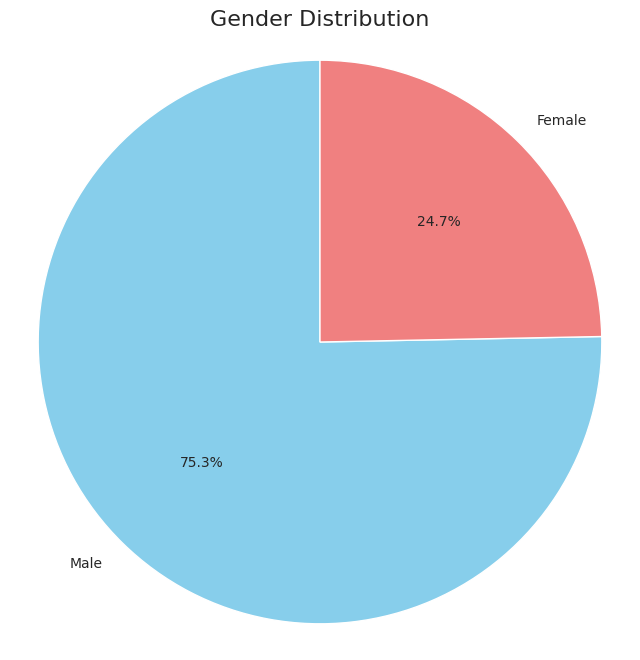

In [103]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution', fontsize=16)
plt.axis('equal')
plt.show()

# Insights
## Gender Distribution (Pie Chart)

- The gender distribution shows a significant skew towards males, who make up 75.3% of the population, compared to 24.7% females. This suggests that the dataset or sample population is predominantly male, which could influence marketing strategies or product targeting.

- The large disparity between male and female percentages indicates a potential imbalance in the data collection process or a specific demographic focus, possibly reflecting Walmart’s customer base or the region from which the data was gathered.


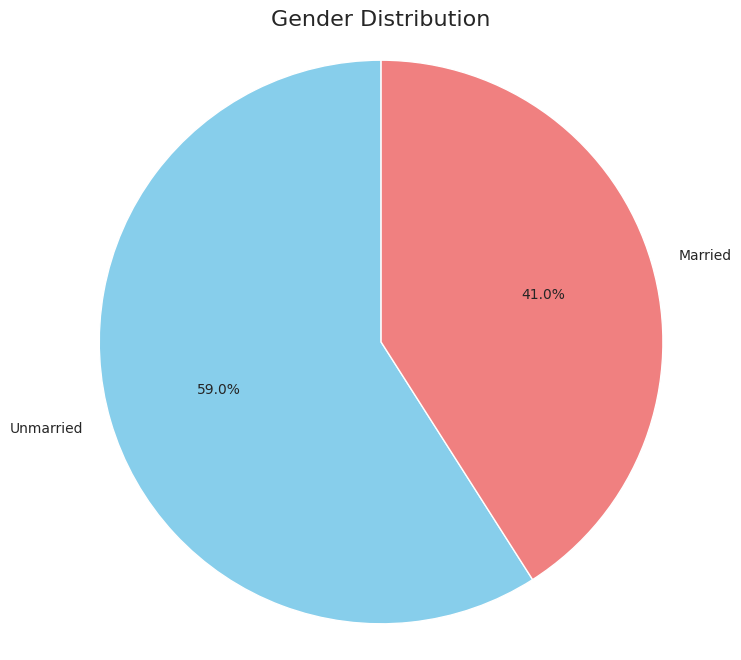

In [104]:
gender_counts = df['Marital_Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Unmarried', 'Married'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution', fontsize=16)
plt.axis('equal')
plt.show()

# Insights

## Marital Status Distribution (Pie Chart)

- The marital status distribution is fairly balanced, with 59.0% unmarried and 41.0% married individuals. This suggests a diverse customer base in terms of marital status, with a slight lean towards unmarried customers.

- The nearly even split could imply that both married and unmarried individuals contribute significantly to purchases, but the higher percentage of unmarried customers might indicate a younger demographic or a trend towards single-person households.




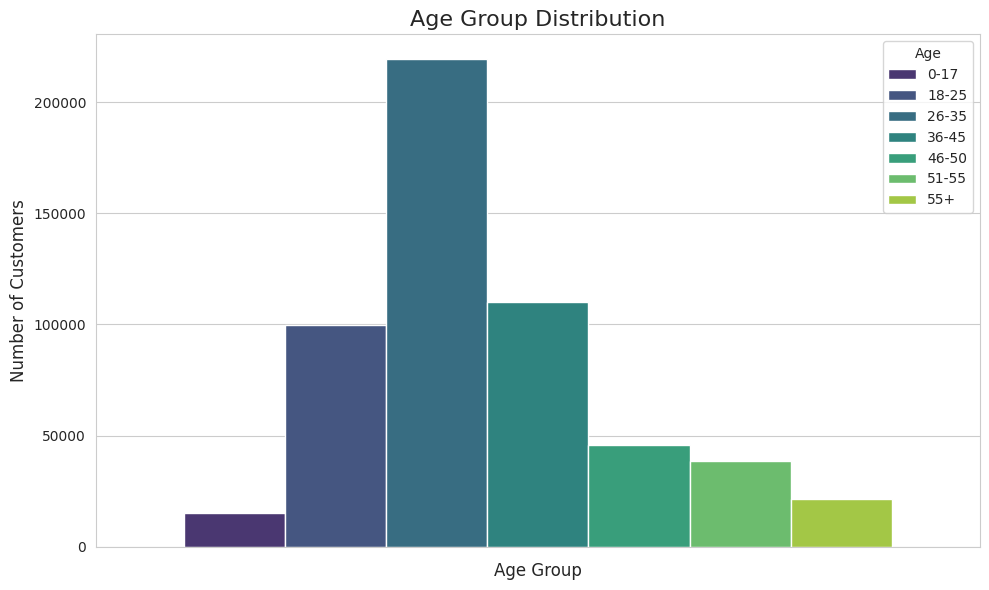

In [105]:
age_counts = df['Age'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(hue=age_counts.index, y=age_counts.values, palette="viridis")
plt.title('Age Group Distribution', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Insights
## Age Group Distribution (Bar Chart)

- The age group with the highest number of customers is the 26-35 range, exceeding 200,000 individuals, followed by the 36-45 age group with around 100,000-150,000. This indicates that the prime working-age population is the most represented in the dataset.

- The number of customers decreases significantly in the older age groups (46-55, 51-55, and 55+), with the 0-17 age group being the smallest. This suggests that Walmart’s customer base is heavily skewed towards adults, particularly those in their 20s to 40s.



<Figure size 1400x800 with 0 Axes>

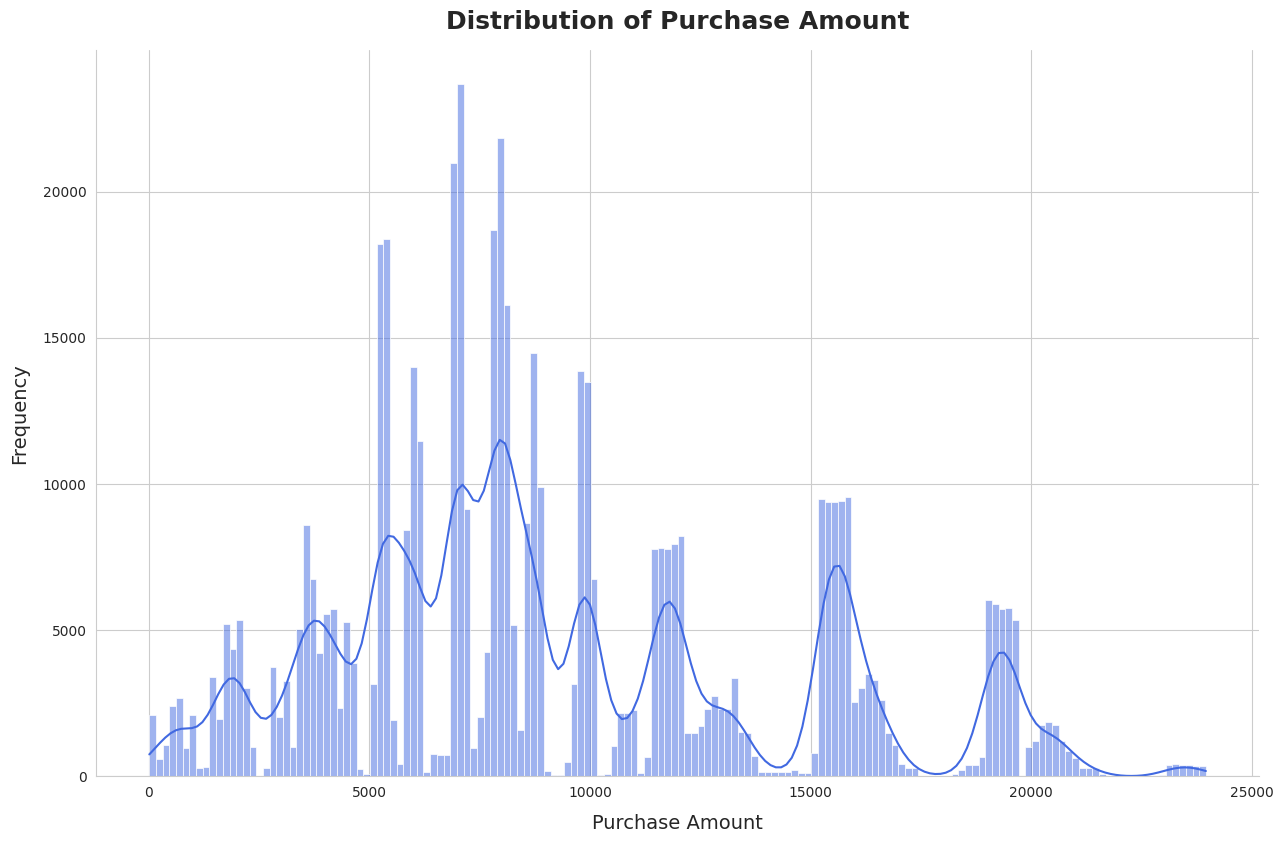

In [106]:
plt.figure(figsize=(14, 8))

sns.displot(df['Purchase'], kde=True, height=8, aspect=1.6, color='royalblue')

plt.title('Distribution of Purchase Amount', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Purchase Amount', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)

plt.show()

# Insights

## Distribution of Purchase Amount (Histogram)

- The purchase amounts are highly variable, with multiple peaks around 0-5,000, 10,000-15,000, and 20,000-25,000 units, indicating that customers tend to spend in distinct clusters rather than a uniform distribution. This could reflect different product categories or purchasing behaviors.

- The frequency drops sharply beyond 25,000 units, suggesting that high-value purchases are rare. This might indicate that most customers make moderate purchases, with fewer engaging in bulk or luxury buying.

## Bivariate Analysis

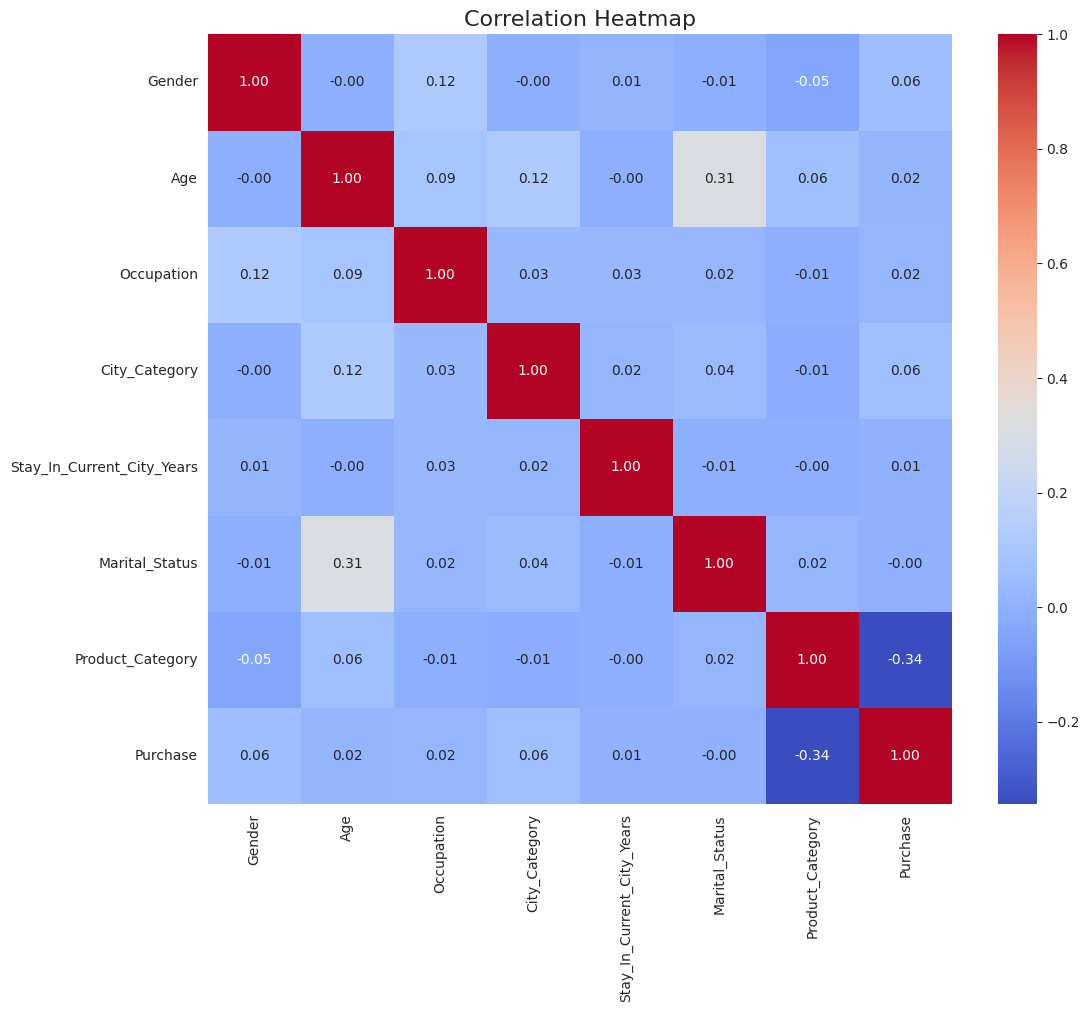

In [107]:
# Columns to label encode
ordinal_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',]
df_heatmap = df.copy(deep=True)
# Apply Label Encoding
le = LabelEncoder()
for col in ordinal_cols:
    df_heatmap[col] = le.fit_transform(df_heatmap[col])

columns_heatmap = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase']
plt.figure(figsize=(12, 10))
sns.heatmap(df_heatmap[columns_heatmap].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


# Insights
## Correlation Heatmap

- Strong positive correlations (close to 1.0) are observed along the diagonal (e.g., Gender with Gender, Age with Age), which is expected as these are self-correlations. Additionally, there’s a notable correlation between Marital Status and Age (0.31), suggesting that age might influence marital status within this dataset.

- A moderate negative correlation (-0.34) exists between Product Category and Purchase Amount, indicating that certain product categories might be associated with lower purchase amounts. This could help in identifying which products drive higher spending.


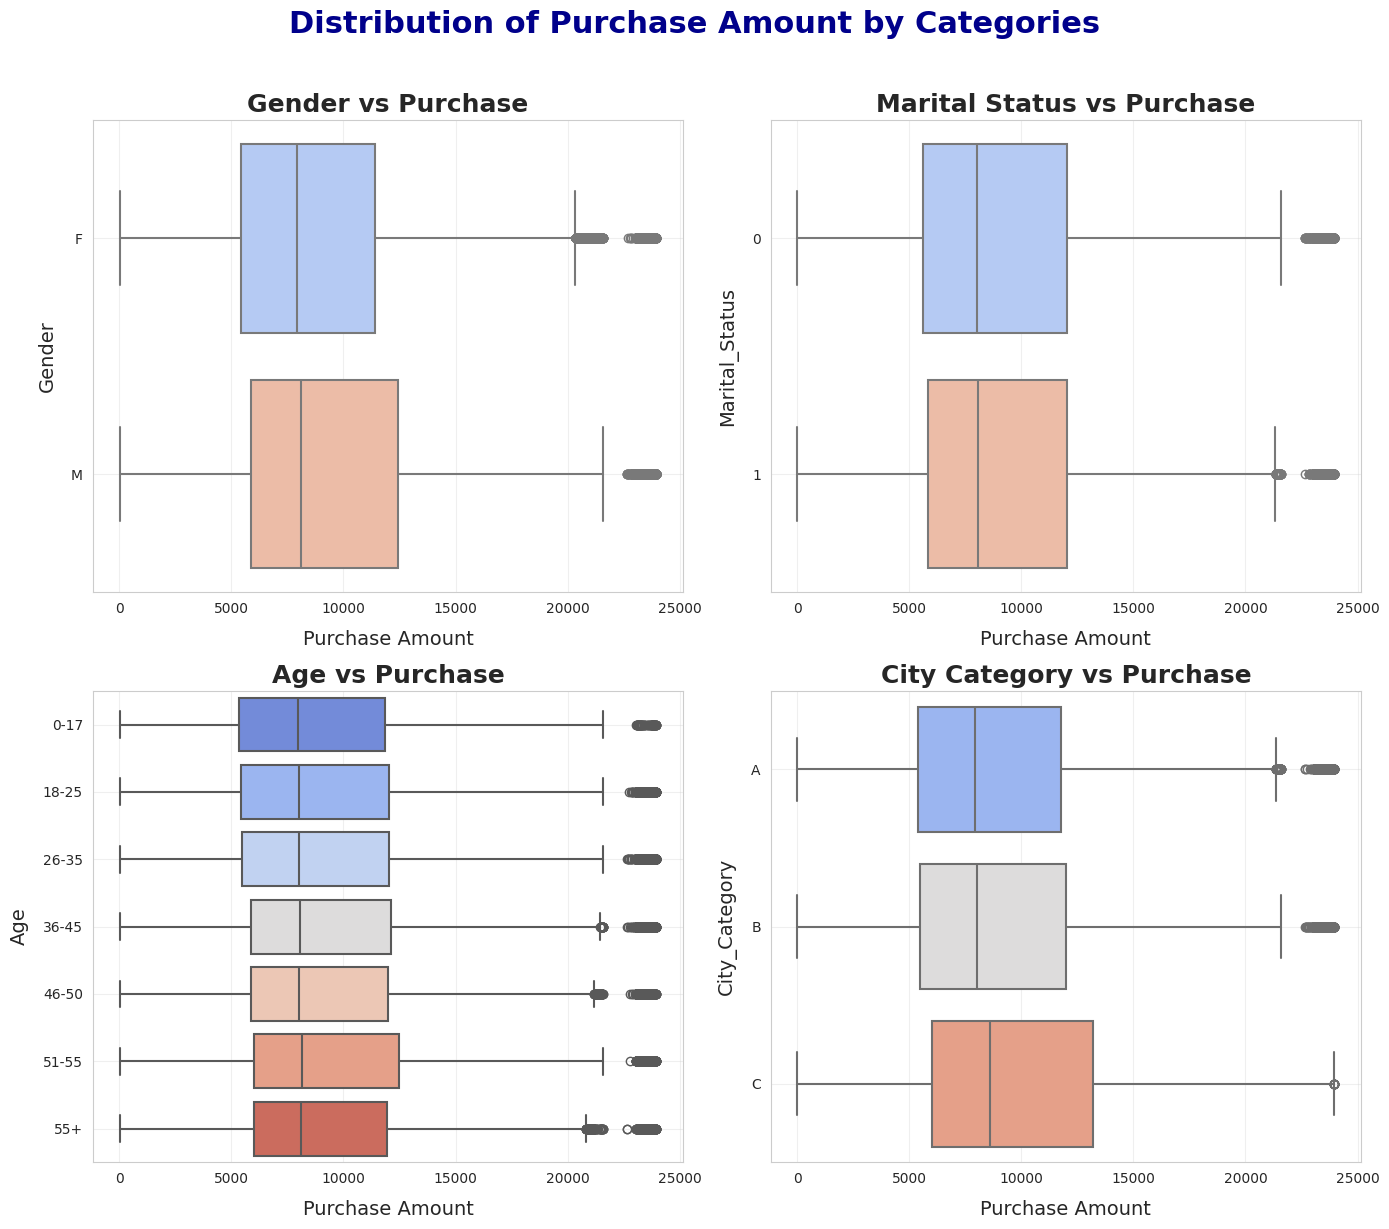

In [108]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

boxplot_params = {
    "data": df,
    "x": "Purchase",
    "orient": "h",
    "palette": "coolwarm",
    "linewidth": 1.5
}


sns.boxplot(y="Gender", **boxplot_params, ax=axs[0, 0])
axs[0, 0].set_title("Gender vs Purchase", fontsize=18, fontweight='bold')

sns.boxplot(y="Marital_Status", **boxplot_params, ax=axs[0, 1])
axs[0, 1].set_title("Marital Status vs Purchase", fontsize=18, fontweight='bold')

sns.boxplot(y="Age", **boxplot_params, ax=axs[1, 0])
axs[1, 0].set_title("Age vs Purchase", fontsize=18, fontweight='bold')

sns.boxplot(y="City_Category", **boxplot_params, ax=axs[1, 1])
axs[1, 1].set_title("City Category vs Purchase", fontsize=18, fontweight='bold')


for ax in axs.flatten():
    ax.set_xlabel("Purchase Amount", fontsize=14, labelpad=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14, labelpad=10)
    ax.grid(alpha=0.3)


fig.suptitle("Distribution of Purchase Amount by Categories", fontsize=22, fontweight='bold', color="darkblue", y=1.02)


plt.tight_layout()
plt.show()


# Insights

### Gender vs. Purchase Amount  
- Both males (M) and females (F) have a similar median purchase amount, around 10,000 to 15,000 units, but males exhibit a slightly wider interquartile range (IQR) and more outliers extending towards higher purchase amounts (up to 25,000). This suggests that while the typical spending for both genders is comparable, males are more likely to make larger purchases, indicating greater variability in their spending behavior.  

### Marital Status vs. Purchase Amount  
- Unmarried individuals (0) have a slightly higher median purchase amount compared to married individuals (1), with both medians falling around 10,000 to 15,000 units. However, unmarried individuals show a few more outliers on the higher end (around 25,000), suggesting that unmarried customers might be more prone to occasional high-value purchases, possibly due to fewer household financial constraints.  

### Age vs. Purchase Amount  
- The 26-35 and 36-45 age groups have the highest median purchase amounts, around 15,000 units, with the widest IQRs and several outliers reaching up to 25,000. In contrast, the 0-17 and 55+ age groups have the lowest medians (closer to 5,000-10,000) and narrower ranges, indicating that younger and older customers tend to spend less, while the middle age groups are the biggest spenders, likely due to higher disposable income and greater purchasing needs.  

### City Category vs. Purchase Amount  
- City Category C has the highest median purchase amount, around 15,000 units, with a wider IQR and more outliers extending to 25,000, compared to Categories A and B, which have medians closer to 10,000-12,000 units. This suggests that customers in City Category C, possibly representing urban or more affluent areas, tend to spend more on average and are more likely to make larger purchases than those in Categories A and B.  


# Data Exploration

In [109]:
male_average = df[df['Gender'] == 'M']['Purchase'].mean()
female_average = df[df['Gender'] == 'F']['Purchase'].mean()


print(f'The count of Male: {green_bold(df[df["Gender"] == "M"].shape[0])}')
print(f'Male Average Purchase: {green_bold(round(male_average,2))}')

print(f'\nThe count of Female: {green_bold(df[df["Gender"] == "F"].shape[0])}')
print(f'Female Average Purchase: {green_bold(round(female_average,2))}')

print('\nThe total count of Male and Female: ',green_bold(df['Gender'].count()))
print('The total average of purchase: ', green_bold(round(df['Purchase'].mean())))

The count of Male: 414259
Male Average Purchase: 9437.53

The count of Female: 135809
Female Average Purchase: 8734.57

The total count of Male and Female:  550068
The total average of purchase:  9264


In [110]:
gender_average_by_user_id = df.groupby(['User_ID', 'Gender'], observed=True)[['Purchase']].agg({'Purchase':['mean']}).round(2).reset_index()
gender_average_by_user_id.head(10)

,User_ID,Gender,Purchase
,,,mean
0,1000001,F,9545.51
1,1000002,M,10525.61
2,1000003,M,11780.52
3,1000004,M,14747.71
4,1000005,M,7745.29
5,1000006,F,8083.62
6,1000007,M,13804.00
7,1000008,M,10345.36
8,1000009,M,10243.09


* The highest-spending customer (User_ID = 1003902, Male) has an average purchase of 18,577.89.
* Females also appear in the top spenders (e.g., User_ID = 1005069, 1005999), indicating high-value female customers.
* Males dominate the top spenders (7 out of 10), suggesting that men tend to have higher average purchase values.
## Business Insight and Strategy:
* Offer VIP loyalty programs or exclusive deals to high-spending customers.
* Analyze what products/services these high-value customers purchase most frequently.
* Targeted promotions for high-spending female customers to increase retention.

In [111]:
# Group by User_ID and Gender, summing total spending per user
total_spent_per_user = df.groupby(['User_ID', 'Gender'], observed=True)['Purchase'].sum().reset_index()

# Compute the average total spending per gender
avg_total_spent_per_gender = total_spent_per_user.groupby('Gender', observed=True)['Purchase'].mean()

# Display results
print(f'Male customer average total spent amount: {green_bold(round(avg_total_spent_per_gender["M"], 2))}')
print(f'Female customer average total spent amount: {green_bold(round(avg_total_spent_per_gender["F"], 2))}')


Male customer average total spent amount: 925344.4
Female customer average total spent amount: 712024.39


## Insights:
* This suggests that male customers make higher total purchases over time.
### Possible reasons:
* Males might shop more frequently or buy higher-value products.
* Marketing strategies could target female customers to increase engagement and spending.

# CLT and Confidence intervals

In [112]:
def compute_confidence_interval_for_samples(data, sample_size, confidence = 0.95, n_samples=1000):

  sample_means = [data.sample(sample_size, random_state=i).mean() for i in range(n_samples)] # mean for each sample
  sample_means_mean = np.mean(sample_means)
  standard_error_sample = np.std(sample_means, ddof=1) # SE of all means
  margin_error = ((1 + confidence) / 2) * standard_error_sample

  return sample_means, [round(sample_means_mean - margin_error ,2), round(sample_means_mean + margin_error, 2)]


def is_confidence_interval_overlapping(CI_1, CI_2):
  return CI_1[0] <= CI_2[1] and CI_2[0] <= CI_1[1]

import pandas as pd

def compute_confidence_intervals(n_data, n_labels, n_sample_size, n_samples, n_confidence_lvl):
  columns = ['Confidence Level', 'Sample Size', 'Number Of Samples'] + [f'{label} Confidence Interval' for label in n_labels]
  confidence_interval_df = pd.DataFrame(columns=columns)

  # Initialize dictionaries for best values
  best_results = {
      label: {"mean": None, "sample_size": None, "n_samples": None, "conf_lvl": None, "conf_interval":None, "ci_width": float('inf')}
      for label in n_labels
  }

  for n_sample in n_samples:
    for sample_size in n_sample_size:
      for confidence_lvl in n_confidence_lvl:
        n_ci = []
        results = []  # Collect results for printing

        for label, data in zip(n_labels, n_data):
          # Compute confidence interval
          sample_means, ci = compute_confidence_interval_for_samples(data, sample_size, confidence=confidence_lvl, n_samples=n_sample)
          ci_width = ci[1] - ci[0]  # Confidence Interval width

          # Store CI for DataFrame
          n_ci.append(str(ci))

          # Update best results if this CI width is smaller
          if ci_width < best_results[label]['ci_width']:
            best_results[label].update({
                "sample_means": sample_means,
                "sample_size": sample_size,
                "n_samples": n_sample,
                "conf_lvl": confidence_lvl,
                "ci_width": ci_width,
                "conf_interval": ci
            })

          # Collect results for print
          results.append(f"{blue_bold(f'{label} CI:')} {green_bold(ci)}")

        # Store results in DataFrame
        confidence_interval_df.loc[len(confidence_interval_df)] = [confidence_lvl, sample_size, n_sample] + n_ci

  # Extract best results
  best_sample_means = {label: best_results[label]["sample_means"] for label in n_labels}
  best_sample_size = {label: best_results[label]["sample_size"] for label in n_labels}
  best_n_samples = {label: best_results[label]["n_samples"] for label in n_labels}
  best_conf_lvl = {label: best_results[label]["conf_lvl"] for label in n_labels}
  best_conf_interval = {label: best_results[label]["conf_interval"] for label in n_labels}

  return best_sample_means, best_sample_size, best_n_samples, best_conf_lvl, best_conf_interval, confidence_interval_df

# 1. CI for Male and Female

In [113]:
n_sample_size = [300, 1000]
n_confidence_lvl = [0.95]
n_samples = [1000, 2000]

In [114]:
# Get purchase values for each gender
male_spending = df[df['Gender'] == 'M']['Purchase']
female_spending = df[df['Gender'] == 'F']['Purchase']

n_data = [male_spending, female_spending]
n_labels = ['Male', 'Female']

best_means, best_sizes, best_samples, best_conf, best_conf_interval, confidence_df = compute_confidence_intervals(
    n_data=n_data,
    n_labels=n_labels,
    n_sample_size=n_sample_size,
    n_samples=n_samples,
    n_confidence_lvl=n_confidence_lvl
)

confidence_df

,Confidence Level,Sample Size,Number Of Samples,Male Confidence Interval,Female Confidence Interval
0,0.95,300,1000,"[9162.74, 9711.19]","[8457.48, 8996.49]"
1,0.95,1000,1000,"[9295.65, 9594.52]","[8583.08, 8886.06]"
2,0.95,300,2000,"[9159.21, 9719.34]","[8457.75, 8997.38]"
3,0.95,1000,2000,"[9289.63, 9599.17]","[8579.39, 8877.89]"



The below are the parameters for BEST CI:

Male:
Sample Size: 1000
Number of Samples: 1000
Confidence Level: 95.0%
Confidence Interval: [9295.65, 9594.52]

Female:
Sample Size: 1000
Number of Samples: 2000
Confidence Level: 95.0%
Confidence Interval: [8579.39, 8877.89]



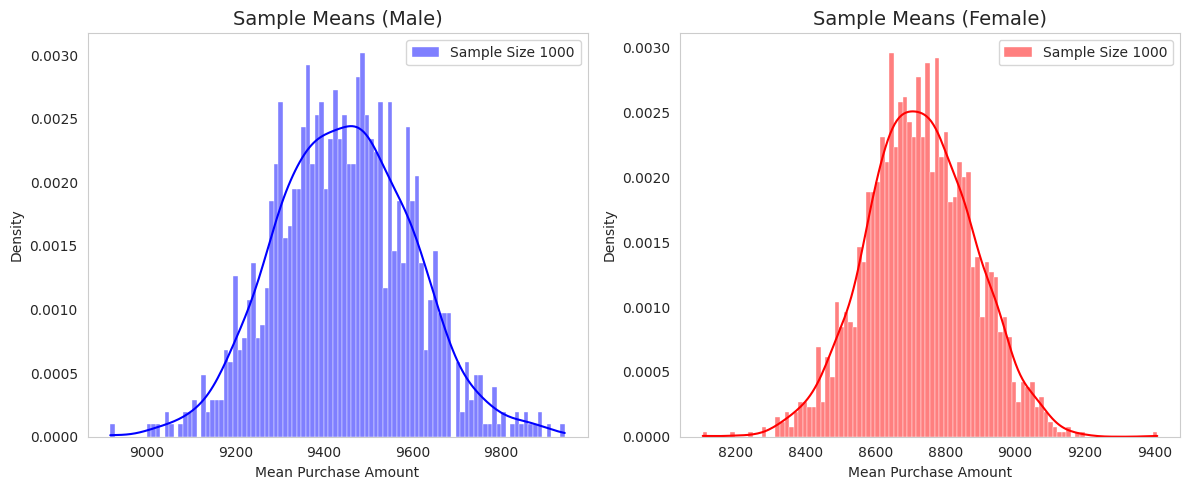

In [115]:
labels = ["Male", "Female"]
colors = ["blue", "red"]

# Print Parameters for Best Confidence Interval
print("\nThe below are the parameters for BEST CI:\n")

for label in labels:
    print(f"{blue_bold(label + ':')}")
    print(f"Sample Size: {green_bold(best_sizes[label])}")
    print(f"Number of Samples: {green_bold(best_samples[label])}")
    print(f"Confidence Level: {green_bold(best_conf[label] * 100)}%")
    print(f"Confidence Interval: {green_bold(best_conf_interval[label])}\n")

# Plot Sample Means Distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, label, color in zip(axes, labels, colors):
    sns.histplot(best_means[label], bins=100, kde=True, stat='density', ax=ax, color=color, label=f"Sample Size {best_sizes[label]}")
    ax.set_title(f"Sample Means ({label})", fontsize=14)
    ax.set_xlabel("Mean Purchase Amount")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()


In [116]:
print("\n" + "="*80)
print(blue_bold("Confidence Interval Overlap Analysis"))
print("="*80 + "\n")

overlaps = is_confidence_interval_overlapping(best_conf_interval['Male'], best_conf_interval['Female'])
status = green_bold("✔ Overlaps") if overlaps else red_bold("❌ Does Not Overlap")

print(f"{blue_bold('CI for Male')}")
print(f"{blue_bold('vs. CI Female')}")
print(f"➡ {status}\n")


Confidence Interval Overlap Analysis

CI for Male
vs. CI Female
➡ ❌ Does Not Overlap



## Insights

The confidence intervals (CIs) for male and female purchase amounts do not overlap, indicating a statistically significant difference in their average spending behavior. This suggests that male and female customers have different purchasing patterns, possibly influenced by product preferences, shopping frequency, or budget considerations.

# 2. CI - Married vs Unmarried

In [117]:
# Get purchase values for maritial status
married_spending = df[df['Marital_Status'] == 1]['Purchase']
unmarried_spending = df[df['Marital_Status'] == 0]['Purchase']

n_data = [married_spending, unmarried_spending]
n_labels = ['Married', 'Unmarried']

best_means, best_sizes, best_samples, best_conf, best_conf_interval, confidence_df = compute_confidence_intervals(
    n_data=n_data,
    n_labels=n_labels,
    n_sample_size=n_sample_size,
    n_samples=n_samples,
    n_confidence_lvl=n_confidence_lvl
)

confidence_df

,Confidence Level,Sample Size,Number Of Samples,Married Confidence Interval,Unmarried Confidence Interval
0,0.95,300,1000,"[8986.79, 9533.94]","[8989.09, 9549.35]"
1,0.95,1000,1000,"[9106.1, 9404.99]","[9102.34, 9420.67]"
2,0.95,300,2000,"[8981.26, 9538.21]","[8992.84, 9557.94]"
3,0.95,1000,2000,"[9103.38, 9409.01]","[9103.96, 9423.3]"



The below are the parameters for BEST CI:

Married:
Sample Size: 1000
Number of Samples: 1000
Confidence Level: 95.0%
Confidence Interval: [9106.1, 9404.99]

Unmarried:
Sample Size: 1000
Number of Samples: 1000
Confidence Level: 95.0%
Confidence Interval: [9102.34, 9420.67]



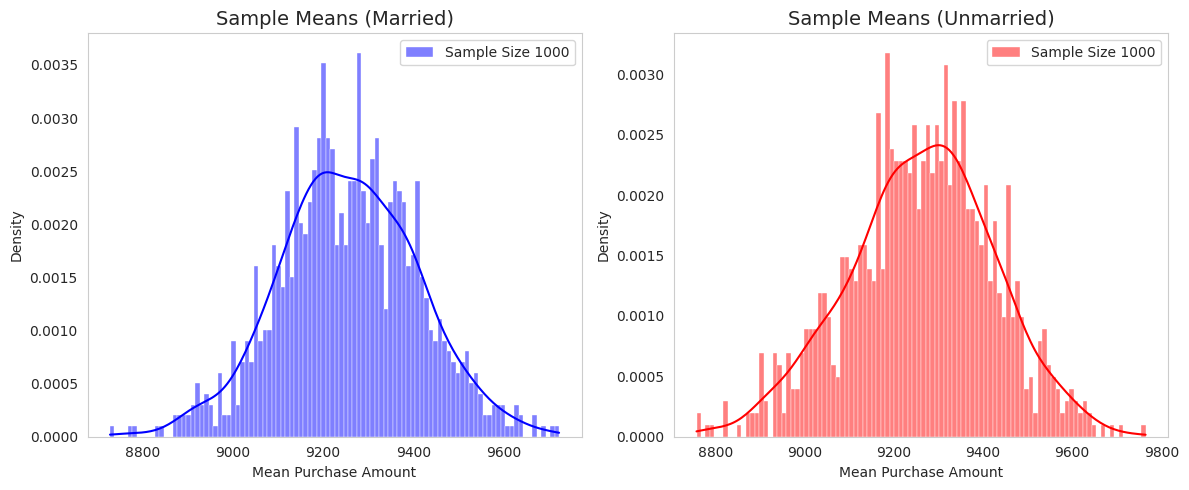

In [118]:
labels = ["Married", "Unmarried"]
colors = ["blue", "red"]

# Print Parameters for Best Confidence Interval
print("\nThe below are the parameters for BEST CI:\n")

for label in labels:
    print(f"{blue_bold(label + ':')}")
    print(f"Sample Size: {green_bold(best_sizes[label])}")
    print(f"Number of Samples: {green_bold(best_samples[label])}")
    print(f"Confidence Level: {green_bold(best_conf[label] * 100)}%")
    print(f"Confidence Interval: {green_bold(best_conf_interval[label])}\n")

# Plot Sample Means Distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, label, color in zip(axes, labels, colors):
    sns.histplot(best_means[label], bins=100, kde=True, stat='density', ax=ax, color=color, label=f"Sample Size {best_sizes[label]}")
    ax.set_title(f"Sample Means ({label})", fontsize=14)
    ax.set_xlabel("Mean Purchase Amount")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()


In [119]:
print("\n" + "="*80)
print(blue_bold("Confidence Interval Overlap Analysis"))
print("="*80 + "\n")

overlaps = is_confidence_interval_overlapping(best_conf_interval['Married'], best_conf_interval['Unmarried'])
status = green_bold("✔ Overlaps") if overlaps else red_bold("❌ Does Not Overlap")

print(f"{blue_bold('CI for Married')}")
print(f"{blue_bold('vs. CI Unmarried')}")
print(f"➡ {status}\n")


Confidence Interval Overlap Analysis

CI for Married
vs. CI Unmarried
➡ ✔ Overlaps



## Insights
###Spending Behavior Between Married and Unmarried Customers
The overlapping confidence intervals (CIs) indicate no significant difference in spending between married and unmarried customers. This suggests that marital status does not strongly influence purchasing behavior, meaning both groups have similar shopping patterns and spending habits.

# 3. CI for Age groups

In [120]:
n_labels = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
n_data = [df[df['Age'] == age]['Purchase'] for age in n_labels] # Get purchase values for each age group

# Compute confidence intervals for each age group
best_means, best_sizes, best_samples, best_conf, best_conf_interval, confidence_df = compute_confidence_intervals(
    n_data=n_data,
    n_labels=n_labels,
    n_sample_size=n_sample_size,
    n_samples=n_samples,
    n_confidence_lvl=n_confidence_lvl
)

confidence_df

,Confidence Level,Sample Size,Number Of Samples,0-17 Confidence Interval,18-25 Confidence Interval,26-35 Confidence Interval,36-45 Confidence Interval,46-50 Confidence Interval,51-55 Confidence Interval,55+ Confidence Interval
0,0.95,300,1000,"[8651.09, 9212.89]","[8885.51, 9445.1]","[8949.11, 9517.74]","[9057.74, 9641.2]","[8929.13, 9470.64]","[9246.07, 9813.74]","[9072.12, 9630.6]"
1,0.95,1000,1000,"[8780.66, 9075.15]","[9030.83, 9326.46]","[9094.79, 9402.68]","[9181.77, 9496.84]","[9058.8, 9361.13]","[9380.12, 9673.66]","[9190.48, 9487.23]"
2,0.95,300,2000,"[8644.35, 9211.24]","[8886.21, 9447.49]","[8955.56, 9523.49]","[9053.63, 9624.36]","[8932.41, 9482.44]","[9254.2, 9809.49]","[9054.02, 9616.18]"
3,0.95,1000,2000,"[8781.17, 9075.79]","[9020.48, 9324.73]","[9097.03, 9408.34]","[9178.12, 9493.57]","[9060.79, 9361.54]","[9380.76, 9679.02]","[9182.65, 9481.8]"


In [121]:
# Define colors for plots
colors = ["blue", "red", "green", "orange", "purple", "cyan", "magenta"]

# Print Parameters for Best Confidence Interval
print("\nThe below are the parameters for BEST CI:\n")

for label in n_labels:
    print(f"{blue_bold('Age Group - '+ label + ':')}")
    print(f"Sample Size: {green_bold(best_sizes[label])}")
    print(f"Number of Samples: {green_bold(best_samples[label])}")
    print(f"Confidence Level: {green_bold(best_conf[label] * 100)}%")
    print(f"Confidence Interval: {green_bold(best_conf_interval[label])}\n")


The below are the parameters for BEST CI:

Age Group - 0-17:
Sample Size: 1000
Number of Samples: 1000
Confidence Level: 95.0%
Confidence Interval: [8780.66, 9075.15]

Age Group - 18-25:
Sample Size: 1000
Number of Samples: 1000
Confidence Level: 95.0%
Confidence Interval: [9030.83, 9326.46]

Age Group - 26-35:
Sample Size: 1000
Number of Samples: 1000
Confidence Level: 95.0%
Confidence Interval: [9094.79, 9402.68]

Age Group - 36-45:
Sample Size: 1000
Number of Samples: 1000
Confidence Level: 95.0%
Confidence Interval: [9181.77, 9496.84]

Age Group - 46-50:
Sample Size: 1000
Number of Samples: 2000
Confidence Level: 95.0%
Confidence Interval: [9060.79, 9361.54]

Age Group - 51-55:
Sample Size: 1000
Number of Samples: 1000
Confidence Level: 95.0%
Confidence Interval: [9380.12, 9673.66]

Age Group - 55+:
Sample Size: 1000
Number of Samples: 1000
Confidence Level: 95.0%
Confidence Interval: [9190.48, 9487.23]



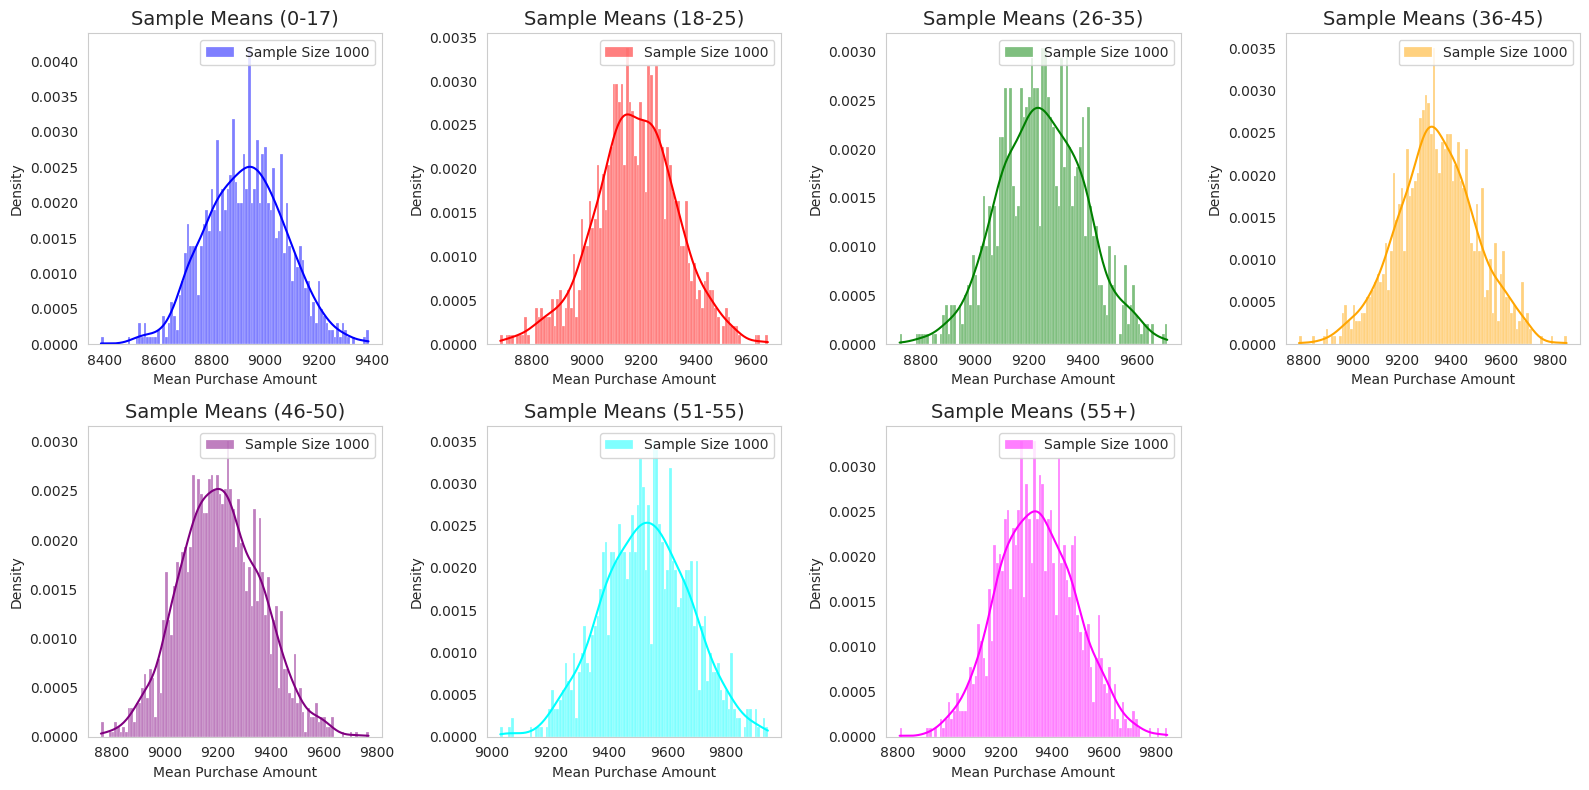

In [122]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

axes = axes.flatten()  # Flatten to access in a loop

for ax, label, color in zip(axes, n_labels, colors):

    sns.histplot(best_means[label], bins=100, kde=True, stat='density', ax=ax, color=color, label=f"Sample Size {best_sizes[label]}")
    ax.set_title(f"Sample Means ({label})", fontsize=14)
    ax.set_xlabel("Mean Purchase Amount")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid()

axes[7].set_axis_off() # to remove grid line and other elements of 8th subplot


plt.tight_layout()
plt.show()


In [123]:
# Compare all pairs of confidence intervals
pairs = list(best_conf_interval.values())
n = len(pairs)

print("\n" + "="*80)
print(blue_bold("Confidence Interval Overlap Analysis"))
print("="*80 + "\n")

for i in range(n):
    for j in range(i + 1, n):  # Start j after i to avoid duplicates
        ci_1, ci_2 = pairs[i], pairs[j]
        overlaps = is_confidence_interval_overlapping(ci_1, ci_2)

        # Format output
        status = green_bold("✔ Overlaps") if overlaps else red_bold("❌ Does Not Overlap")
        print(f"{blue_bold('CI for Age Group:')} {green_bold(n_labels[i])} {ci_1}")
        print(f"{blue_bold('vs. CI for Age Group:')} {green_bold(n_labels[j])} {ci_2}")
        print(f"➡ {status}\n")

    print("-" * 80)  # Separate different groups



Confidence Interval Overlap Analysis

CI for Age Group: 0-17 [8780.66, 9075.15]
vs. CI for Age Group: 18-25 [9030.83, 9326.46]
➡ ✔ Overlaps

CI for Age Group: 0-17 [8780.66, 9075.15]
vs. CI for Age Group: 26-35 [9094.79, 9402.68]
➡ ❌ Does Not Overlap

CI for Age Group: 0-17 [8780.66, 9075.15]
vs. CI for Age Group: 36-45 [9181.77, 9496.84]
➡ ❌ Does Not Overlap

CI for Age Group: 0-17 [8780.66, 9075.15]
vs. CI for Age Group: 46-50 [9060.79, 9361.54]
➡ ✔ Overlaps

CI for Age Group: 0-17 [8780.66, 9075.15]
vs. CI for Age Group: 51-55 [9380.12, 9673.66]
➡ ❌ Does Not Overlap

CI for Age Group: 0-17 [8780.66, 9075.15]
vs. CI for Age Group: 55+ [9190.48, 9487.23]
➡ ❌ Does Not Overlap

--------------------------------------------------------------------------------
CI for Age Group: 18-25 [9030.83, 9326.46]
vs. CI for Age Group: 26-35 [9094.79, 9402.68]
➡ ✔ Overlaps

CI for Age Group: 18-25 [9030.83, 9326.46]
vs. CI for Age Group: 36-45 [9181.77, 9496.84]
➡ ✔ Overlaps

CI for Age Group: 18-25 

## Insight
- Younger shoppers (0-17) have significantly different spending patterns compared to middle-aged (26-55) and older shoppers, as their confidence intervals do not overlap. This suggests that younger customers spend less overall.

- 18-25, 26-35, and 36-45 age groups show overlapping CIs, indicating similar spending habits, likely due to stable incomes and higher purchasing power.
-The 51-55 age group stands out with a higher spending pattern, as its CI does not overlap with younger groups (0-25), suggesting older adults may spend more on specific products.
-Most middle-aged and older groups (26-55+) exhibit overlapping spending behaviors, indicating relatively stable purchase trends among working professionals and retirees.

# **Walmart User Insights - collated**  

## **Gender vs. Purchase Amount**  
- **Insight:** Both males (M) and females (F) have a similar median purchase amount, around 10,000 to 15,000 units, but males exhibit a slightly wider interquartile range (IQR) and more outliers extending towards higher purchase amounts (up to 25,000). This suggests that while the typical spending for both genders is comparable, males are more likely to make larger purchases, indicating greater variability in their spending behavior.  

## **Marital Status vs. Purchase Amount**  
- **Insight:** Unmarried individuals (0) have a slightly higher median purchase amount compared to married individuals (1), with both medians falling around 10,000 to 15,000 units. However, unmarried individuals show a few more outliers on the higher end (around 25,000), suggesting that unmarried customers might be more prone to occasional high-value purchases, possibly due to fewer household financial constraints.  

## **Age vs. Purchase Amount**  
- **Insight:** The 26-35 and 36-45 age groups have the highest median purchase amounts, around 15,000 units, with the widest IQRs and several outliers reaching up to 25,000. In contrast, the 0-17 and 55+ age groups have the lowest medians (closer to 5,000-10,000) and narrower ranges, indicating that younger and older customers tend to spend less, while the middle age groups are the biggest spenders, likely due to higher disposable income and greater purchasing needs.  

## **City Category vs. Purchase Amount**  
- **Insight:** City Category C has the highest median purchase amount, around 15,000 units, with a wider IQR and more outliers extending to 25,000, compared to Categories A and B, which have medians closer to 10,000-12,000 units. This suggests that customers in City Category C, possibly representing urban or more affluent areas, tend to spend more on average and are more likely to make larger purchases than those in Categories A and B.  

## **Confidence Interval Overlap Analysis**  

### **Gender-Based Spending Patterns**  
- **Insight:** The confidence intervals (CIs) for **male and female purchase amounts do not overlap**, indicating a **statistically significant difference** in their spending behavior. This suggests that male and female customers may have **different purchasing power, product preferences, or shopping habits**.  

### **Marital Status and Purchase Behavior**  
- **Insight:** The **overlapping confidence intervals** (CIs) for married and unmarried customers suggest **no significant difference in spending behavior**, meaning that marital status does not strongly influence purchasing patterns.  

### **Age-Based Spending Differences**  
- **Insight:** Younger shoppers **(0-17)** have significantly different spending patterns compared to **middle-aged (26-55)** and older shoppers, as their confidence intervals do not overlap. This suggests that younger customers spend less overall.  
- **Insight:** **18-25, 26-35, and 36-45 age groups** show **overlapping CIs**, indicating similar spending habits, likely due to stable incomes and higher purchasing power.  
- **Insight:** The **51-55 age group stands out** with a **higher spending pattern**, as its CI does not overlap with younger groups (0-25), suggesting older adults may spend more on specific products.  
- **Insight:** **Most middle-aged and older groups (26-55+) exhibit overlapping spending behaviors**, indicating **relatively stable purchase trends among working professionals and retirees**.


# Bussiness Recommendations

## **1. Gender-Based Spending Patterns**  
- **Recommendation:** Walmart should **personalize product recommendations** for male and female shoppers based on their spending behavior.  
- **Recommendation:** Since males show **higher spending variability**, Walmart can introduce **premium product bundles** or **exclusive deals** targeting high-spending male customers.  
- **Recommendation:** Female-focused marketing campaigns could encourage increased spending through **personalized discounts and loyalty programs**.  

## **2. Marital Status and Purchase Behavior**  
- **Recommendation:** Since **marital status does not significantly influence spending**, Walmart should **focus on universal promotions** rather than tailoring offers based on marital status.  
- **Recommendation:** Consider **household-based offers**, such as discounts on bulk purchases, that appeal to both married and unmarried customers equally.  

## **3. Age-Based Spending Behavior**  
- **Recommendation:**  
  - **Younger shoppers (0-17)** → Focus on **low-cost, high-utility items** like school supplies and budget-friendly electronics.  
  - **Middle-aged shoppers (26-45)** → Create **premium product promotions**, as this age group has the highest spending power.  
  - **Older shoppers (51+)** → Offer **health-related product deals**, as they show distinct spending behavior compared to younger groups.  

## **4. City Category-Based Spending Behavior**  
- **Recommendation:**  
  - **City Category C shoppers** (who spend more) → Introduce **high-end product lines and premium services** in these areas.  
  - **City Category A and B shoppers** → Promote **affordable pricing strategies and value-based promotions** to increase spending.  

## **5. Product Pricing and Discount Strategies**  
- **Recommendation:** Introduce **age-specific discount programs** for different customer segments based on their spending behavior.  
- **Recommendation:** Optimize pricing strategies in **different city categories** to align with local purchasing power.  

## **6. Advertising and Targeted Marketing**  
- **Recommendation:** Use **AI-driven personalization** to create targeted ad campaigns for different customer groups (gender, age, location).  
- **Recommendation:** Walmart should **test A/B campaigns** to determine which promotions work best for high-spending customers.  

## **7. Inventory Management and Stock Planning**  
- **Recommendation:**  
  - Keep **high-demand products well-stocked** in **City Category C**, as customers here tend to make larger purchases.  
  - Optimize stock levels for **different age groups** based on their spending patterns.  

## **8. Customer Engagement and Retention**  
- **Recommendation:** Introduce **loyalty programs** that reward frequent shoppers based on their spending patterns.  
- **Recommendation:** Walmart should offer **personalized digital coupons** to encourage repeat purchases among all customer segments.  

---
### **Overall Business Strategy:**  
By leveraging these insights, Walmart can **optimize its pricing, marketing, inventory, and customer engagement strategies** to maximize sales and improve customer satisfaction. 🚀  
